In [37]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format

In [38]:
#Import relevant CSV files to the dataset

data_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
data_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
data_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
data_budget = pd.read_csv('zippedData/Mojo_budget_update.csv')
data_budget.head()

,tconst,year,budget
0,tt0099088,1990,40000000
1,tt0099165,1990,47000000
2,tt0099348,1990,22000000
3,tt0099422,1990,47000000
4,tt0099423,1990,70000000


Data Cleaning (Part 2):
In this section, I created an entirely new dataframe using the provided Box Office Mojo movie gross dataset and a dataset 
that I found that showed the budgets for movies on Box Office Mojo.

The new dataset also contained the column 'tframe', which I was able to use to merge the dataframes.
The overall functions are the same, but I needed a clean dataframe with a different name to work from.

In [39]:
df = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [40]:
data_budget_overall = pd.merge(df, data_budget, on='tconst', how='inner')

In [41]:
data_budget_overall = data_budget_overall.rename(columns={'primary_title': 'title'})

In [42]:
## Merged IMDB and BOM data into one dataframe
movie_titles_budget = pd.merge(data_movie_gross, data_budget_overall, on='title', how='inner')
movie_titles_budget.head()

,title,studio,domestic_gross,foreign_gross,year_x,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year_y,budget
0,Toy Story 3,BV,415000000.0000,652000000,2010,tt0435761,Toy Story 3,2010,103.0000,"Adventure,Animation,Comedy",8.3000,682218,2010,200000000
1,Inception,WB,292600000.0000,535700000,2010,tt1375666,Inception,2010,148.0000,"Action,Adventure,Sci-Fi",8.8000,1841066,2010,160000000
2,Shrek Forever After,P/DW,238700000.0000,513900000,2010,tt0892791,Shrek Forever After,2010,93.0000,"Adventure,Animation,Comedy",6.3000,167532,2010,165000000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0000,"Adventure,Drama,Fantasy",5.0000,211733,2010,68000000
4,Iron Man 2,Par.,312400000.0000,311500000,2010,tt1228705,Iron Man 2,2010,124.0000,"Action,Adventure,Sci-Fi",7.0000,657690,2010,200000000


In [43]:
movie_titles_budget = movie_titles_budget.rename(columns={'year_x': 'year'})

In [44]:
movie_titles_budget.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,year_y,budget
0,Toy Story 3,BV,415000000.0000,652000000,2010,tt0435761,Toy Story 3,2010,103.0000,"Adventure,Animation,Comedy",8.3000,682218,2010,200000000
1,Inception,WB,292600000.0000,535700000,2010,tt1375666,Inception,2010,148.0000,"Action,Adventure,Sci-Fi",8.8000,1841066,2010,160000000
2,Shrek Forever After,P/DW,238700000.0000,513900000,2010,tt0892791,Shrek Forever After,2010,93.0000,"Adventure,Animation,Comedy",6.3000,167532,2010,165000000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0000,"Adventure,Drama,Fantasy",5.0000,211733,2010,68000000
4,Iron Man 2,Par.,312400000.0000,311500000,2010,tt1228705,Iron Man 2,2010,124.0000,"Action,Adventure,Sci-Fi",7.0000,657690,2010,200000000


In [45]:
#Dropped all null values and set as default
movie_titles_budget.dropna(axis=0, how='any', inplace=True)

In [46]:
#Converted the column type for 'Foreign Gross' from object to float
movie_titles_budget['foreign_gross'] = movie_titles_budget.foreign_gross.str.split(',').str.join('').astype(float)

In [48]:
#Created a column for total_gross revenue
movie_titles_budget['total_gross'] = movie_titles_budget['domestic_gross'] + movie_titles_budget['foreign_gross']

In [50]:
#Adjusted the columns to eliminate domestic_gross and foreign_gross
movie_titles_budget = movie_titles_budget[['title', 'studio', 'genres', 'total_gross', 'budget', 'year',  'numvotes']]
movie_titles_budget.head()

,title,studio,genres,total_gross,budget,year,numvotes
0,Toy Story 3,BV,"Adventure,Animation,Comedy",1067000000.0000,200000000,2010,682218
1,Inception,WB,"Action,Adventure,Sci-Fi",828300000.0000,160000000,2010,1841066
2,Shrek Forever After,P/DW,"Adventure,Animation,Comedy",752600000.0000,165000000,2010,167532
3,The Twilight Saga: Eclipse,Sum.,"Adventure,Drama,Fantasy",698500000.0000,68000000,2010,211733
4,Iron Man 2,Par.,"Action,Adventure,Sci-Fi",623900000.0000,200000000,2010,657690


In [51]:
info2 = pd.DataFrame(movie_titles_budget['total_gross'].sort_values(ascending=False))
data_set = ['title', 'year', 'budget', 'genres']
for i in data_set:
    info2[i] = movie_titles_budget[i]
info2.head(3)

,total_gross,title,year,budget,genres
542,1405400000.0000,Avengers: Age of Ultron,2015,250000000,"Action,Adventure,Sci-Fi"
733,1332600000.0000,Star Wars: The Last Jedi,2017,317000000,"Action,Adventure,Fantasy"
813,1309500000.0000,Jurassic World: Fallen Kingdom,2018,170000000,"Action,Adventure,Sci-Fi"


Text(0, 0.5, 'Budget (in hundreds of millions)')

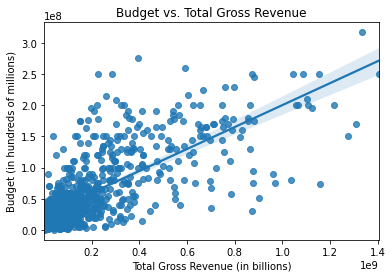

In [52]:
sns.regplot(x=movie_titles_budget['total_gross'], y=movie_titles_budget['budget'])
plt.title('Budget vs. Total Gross Revenue')
plt.xlabel('Total Gross Revenue (in billions)')
plt.ylabel('Budget (in hundreds of millions)')

In [53]:
movie_corr = movie_titles_budget.corr()
movie_corr.loc['total_gross', 'budget']

0.7321644275001877